<a href="https://colab.research.google.com/github/CarlosZuluagaU/KaggleUdeACarlosZuluaga/blob/main/03_modelo_con_preprocesado_de_tal_forma_y_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CARLOS ANDRÉS ZULUAGA AMAYA, ING SISTEMAS


# Modelo: Regresion Logistica


El código entrena un modelo Support Vector Regression (SVR) usando un Pipeline que incluye estandarización de datos y una búsqueda aleatoria de hiperparámetros (RandomizedSearchCV).
SVR es un tipo de máquina de vectores de soporte diseñada para predecir valores numéricos mediante funciones no lineales (kernel RBF).
Antes de entrenar, el dataset se reduce para evitar problemas de rendimiento, ya que SVR no escala bien con muchos datos.





# Importancia

Predicción precisa en problemas no lineales: SVR puede capturar relaciones complejas entre variables.

Robusto ante ruido: No necesita ajustarse a cada punto, lo que evita el sobreajuste.

Uso de soporte vectors: Solo usa los puntos más relevantes para el modelo, haciéndolo más eficiente conceptualmente.

Optimización automática: La búsqueda aleatoria mejora el rendimiento sin probar todas las combinaciones.

Si quieres, también te hago una versión más corta o más formal para un informe.

In [ ]:
!pip install rlxutils


In [ ]:
!pip install kaggle
import os

os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia
!unzip udea*.zip -d data



udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
  inflating: data/submission_example.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [ ]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia


udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!pip install -q kaggle
import os

# Configura la ruta del token
os.environ['KAGGLE_CONFIG_DIR'] = '.'

# Permisos de seguridad para el archivo
!chmod 600 ./kaggle.json

# Descarga el dataset del concurso
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia


udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

print(train.shape)
train.head()


(692500, 21)


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
train.columns.tolist()


['ID',
 'PERIODO_ACADEMICO',
 'E_PRGM_ACADEMICO',
 'E_PRGM_DEPARTAMENTO',
 'E_VALORMATRICULAUNIVERSIDAD',
 'E_HORASSEMANATRABAJA',
 'F_ESTRATOVIVIENDA',
 'F_TIENEINTERNET',
 'F_EDUCACIONPADRE',
 'F_TIENELAVADORA',
 'F_TIENEAUTOMOVIL',
 'E_PRIVADO_LIBERTAD',
 'E_PAGOMATRICULAPROPIO',
 'F_TIENECOMPUTADOR',
 'F_TIENEINTERNET.1',
 'F_EDUCACIONMADRE',
 'RENDIMIENTO_GLOBAL',
 'INDICADOR_1',
 'INDICADOR_2',
 'INDICADOR_3',
 'INDICADOR_4']

In [ ]:
cols = [
    'F_ESTRATOVIVIENDA',
    'E_VALORMATRICULAUNIVERSIDAD',
    'F_EDUCACIONPADRE',
    'F_EDUCACIONMADRE',
    'F_TIENEINTERNET',
    'RENDIMIENTO_GLOBAL'
]

data = train[cols].copy()
data.head()


,F_ESTRATOVIVIENDA,E_VALORMATRICULAUNIVERSIDAD,F_EDUCACIONPADRE,F_EDUCACIONMADRE,F_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,Estrato 3,Entre 5.5 millones y menos de 7 millones,Técnica o tecnológica incompleta,Postgrado,Si,medio-alto
1,Estrato 3,Entre 2.5 millones y menos de 4 millones,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,Estrato 3,Entre 2.5 millones y menos de 4 millones,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Si,bajo
3,Estrato 4,Entre 4 millones y menos de 5.5 millones,No sabe,Secundaria (Bachillerato) completa,Si,alto
4,Estrato 3,Entre 2.5 millones y menos de 4 millones,Primaria completa,Primaria completa,Si,medio-bajo


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='RENDIMIENTO_GLOBAL')
y = data['RENDIMIENTO_GLOBAL']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((554000, 5), (138500, 5))

In [ ]:
# Mapeo de categorías a valores numéricos (aproximados)
mapa_valor = {
    'Menos de 500 mil': 0.25,
    'Entre 500 mil y menos de 1 millón': 0.75,
    'Entre 1 millón y menos de 2.5 millones': 1.75,
    'Entre 2.5 millones y menos de 4 millones': 3.25,
    'Entre 4 millones y menos de 5.5 millones': 4.75,
    'Entre 5.5 millones y menos de 7 millones': 6.25,
    'Más de 7 millones': 7.75,
    'No pagó matrícula': 0,
    'no info': -1
}

# Rellenar valores faltantes
data['E_VALORMATRICULAUNIVERSIDAD'] = data['E_VALORMATRICULAUNIVERSIDAD'].fillna('no info')

# Aplicar mapeo
data['E_VALORMATRICULAUNIVERSIDAD'] = data['E_VALORMATRICULAUNIVERSIDAD'].map(mapa_valor)

# Verificar los resultados
data['E_VALORMATRICULAUNIVERSIDAD'].value_counts()


,count
E_VALORMATRICULAUNIVERSIDAD,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528
-1.00,6287


In [ ]:
# Convertir la variable E_VALORMATRICULAUNIVERSIDAD a categorías numéricas
data['E_VALORMATRICULAUNIVERSIDAD'] = data['E_VALORMATRICULAUNIVERSIDAD'].astype('category').cat.codes



In [ ]:
target_map = {'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2, 'alto': 3}
data['RENDIMIENTO_GLOBAL'] = data['RENDIMIENTO_GLOBAL'].map(target_map)


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('RENDIMIENTO_GLOBAL', axis=1)
y = data['RENDIMIENTO_GLOBAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
data.shape
data['RENDIMIENTO_GLOBAL'].isna().sum()


np.int64(0)

In [ ]:
pd.crosstab(train['F_EDUCACIONPADRE'], train['F_EDUCACIONMADRE'])


F_EDUCACIONMADRE,Educación profesional completa,Educación profesional incompleta,Ninguno,No Aplica,No sabe,Postgrado,Primaria completa,Primaria incompleta,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,Técnica o tecnológica incompleta
F_EDUCACIONPADRE,,,,,,,,,,,,
Educación profesional completa,33303,5322,288,191,335,9212,1316,1749,11369,3679,13496,2655
Educación profesional incompleta,5233,4476,284,91,124,2314,839,1148,4328,2123,4638,1316
Ninguno,412,149,7947,63,59,175,1842,6270,2010,1791,691,452
No Aplica,1079,291,157,567,58,680,626,1194,1744,981,1421,406
No sabe,2244,601,148,63,1086,1228,1041,1827,3164,1882,2548,723
Postgrado,11427,2100,58,101,168,18492,331,400,3736,1024,5151,1111
Primaria completa,1808,565,751,79,138,935,19525,8232,10899,7400,3993,1493
Primaria incompleta,3023,947,3181,199,245,1573,13740,59337,17235,16662,6537,2710
Secundaria (Bachillerato) completa,11835,3050,584,229,295,4956,7449,7727,53902,14426,17727,5873


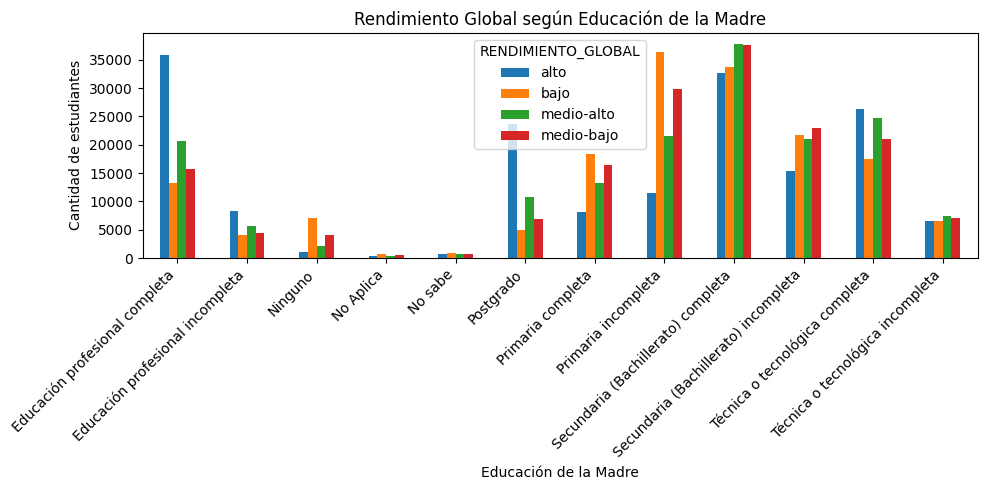

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.crosstab(train['F_EDUCACIONMADRE'], train['RENDIMIENTO_GLOBAL']).plot(kind='bar', figsize=(10,5))
plt.title('Rendimiento Global según Educación de la Madre')
plt.xlabel('Educación de la Madre')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
[col for col in data.columns if 'MADRE' in col]




['F_EDUCACIONMADRE']

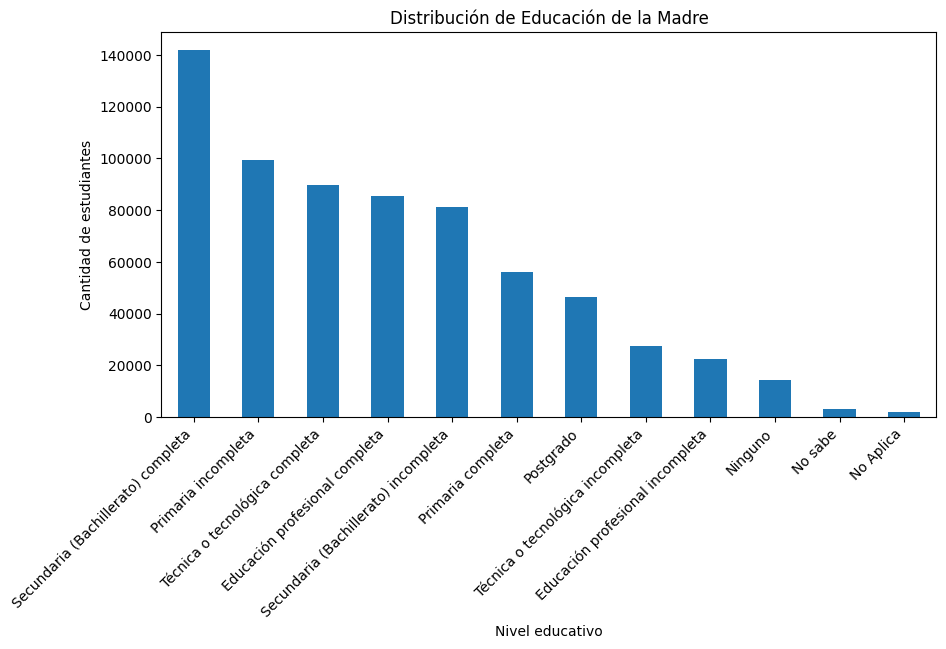

In [ ]:
import matplotlib.pyplot as plt

data['F_EDUCACIONMADRE'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title('Distribución de Educación de la Madre')
plt.xlabel('Nivel educativo')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=45, ha='right')
plt.show()



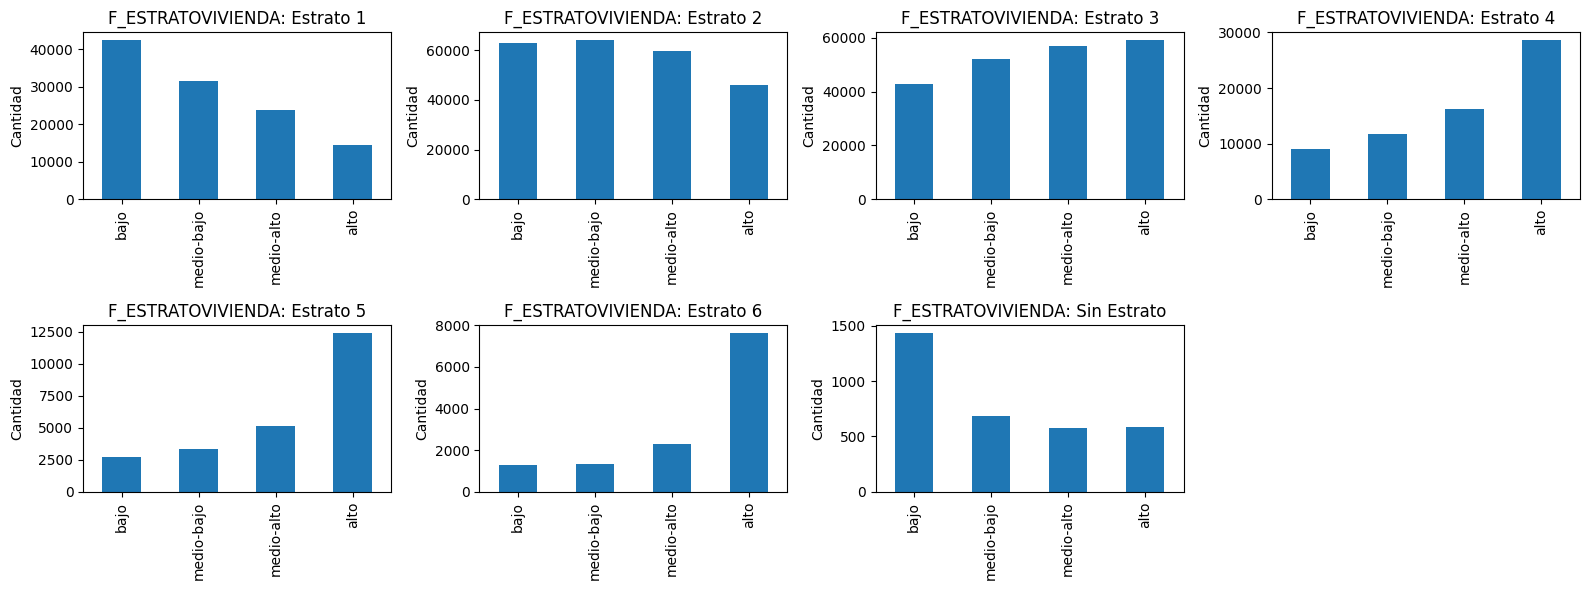

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

col = 'F_ESTRATOVIVIENDA'

# Verificar que la columna existe
if col in train.columns:
    categorias = sorted(train[col].dropna().unique())

    for ax, cat in subplots(categorias, n_cols=4, usizex=4):
        subset = train[train[col] == cat]

        # Contar rendimiento global por categoría
        valores = (
            subset['RENDIMIENTO_GLOBAL']
            .value_counts()
            .reindex(['bajo', 'medio-bajo', 'medio-alto', 'alto'])
        )

        valores.plot(kind='bar', ax=ax)
        ax.set_title(f"{col}: {cat}")
        ax.set_xlabel("")
        ax.set_ylabel("Cantidad")
else:
    print(f"⚠️ La columna '{col}' no existe en el DataFrame.")


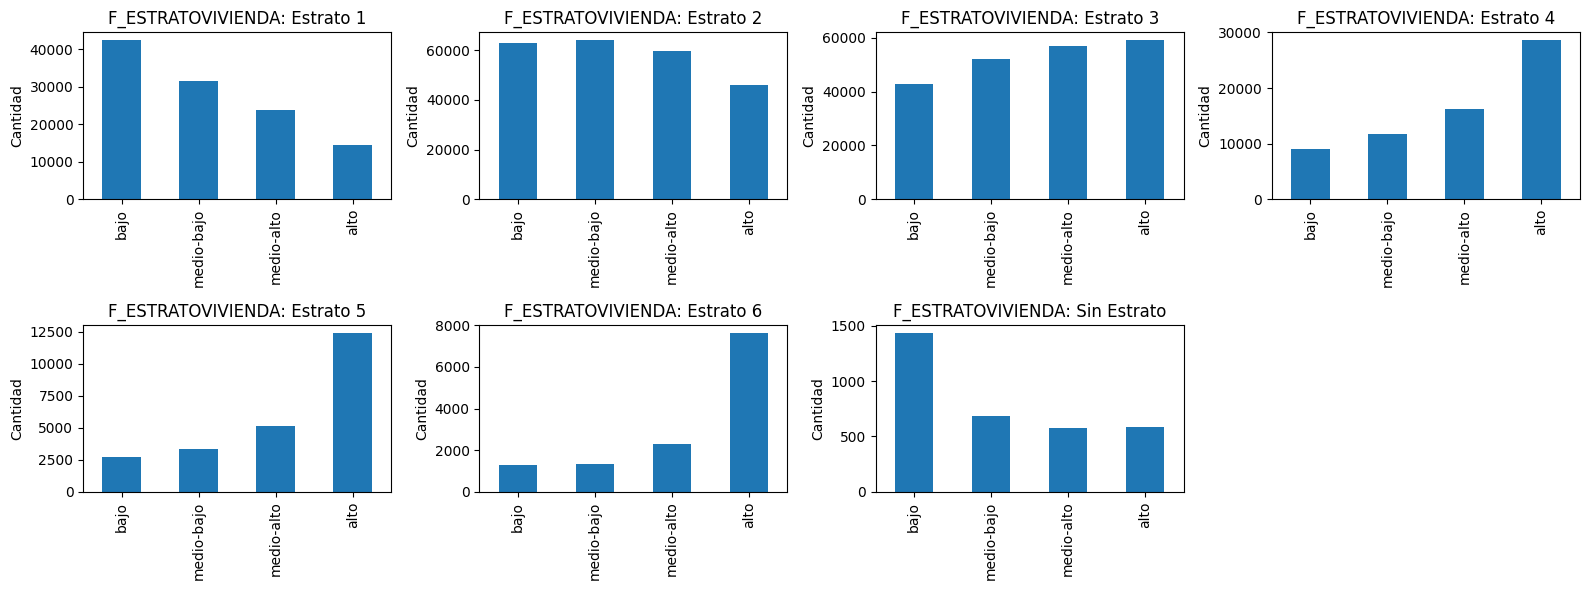

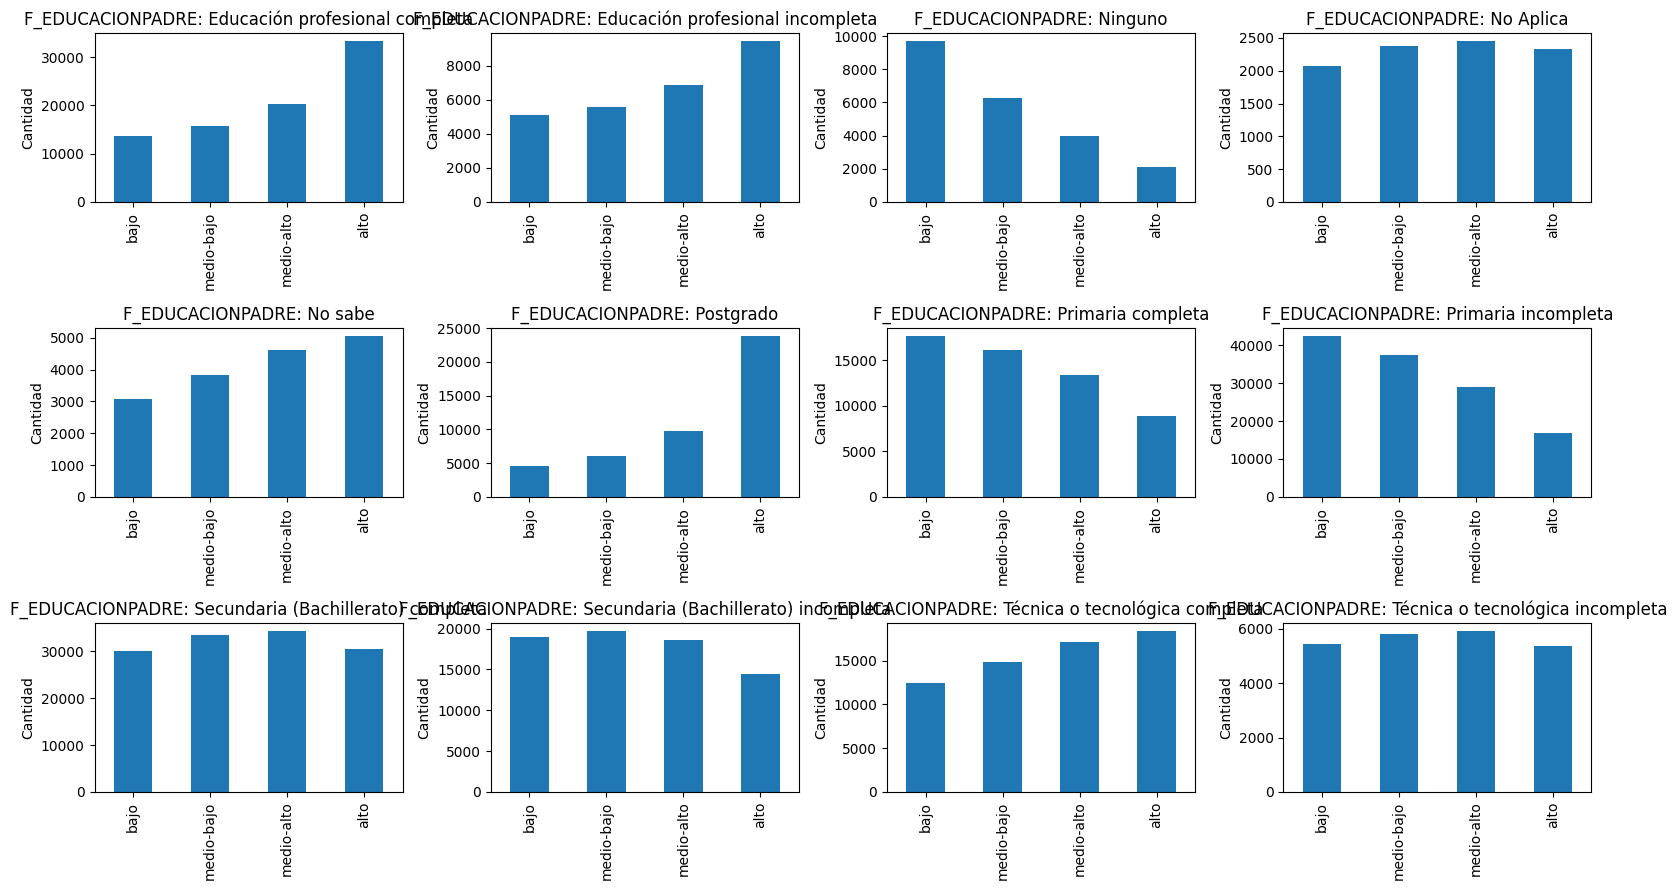

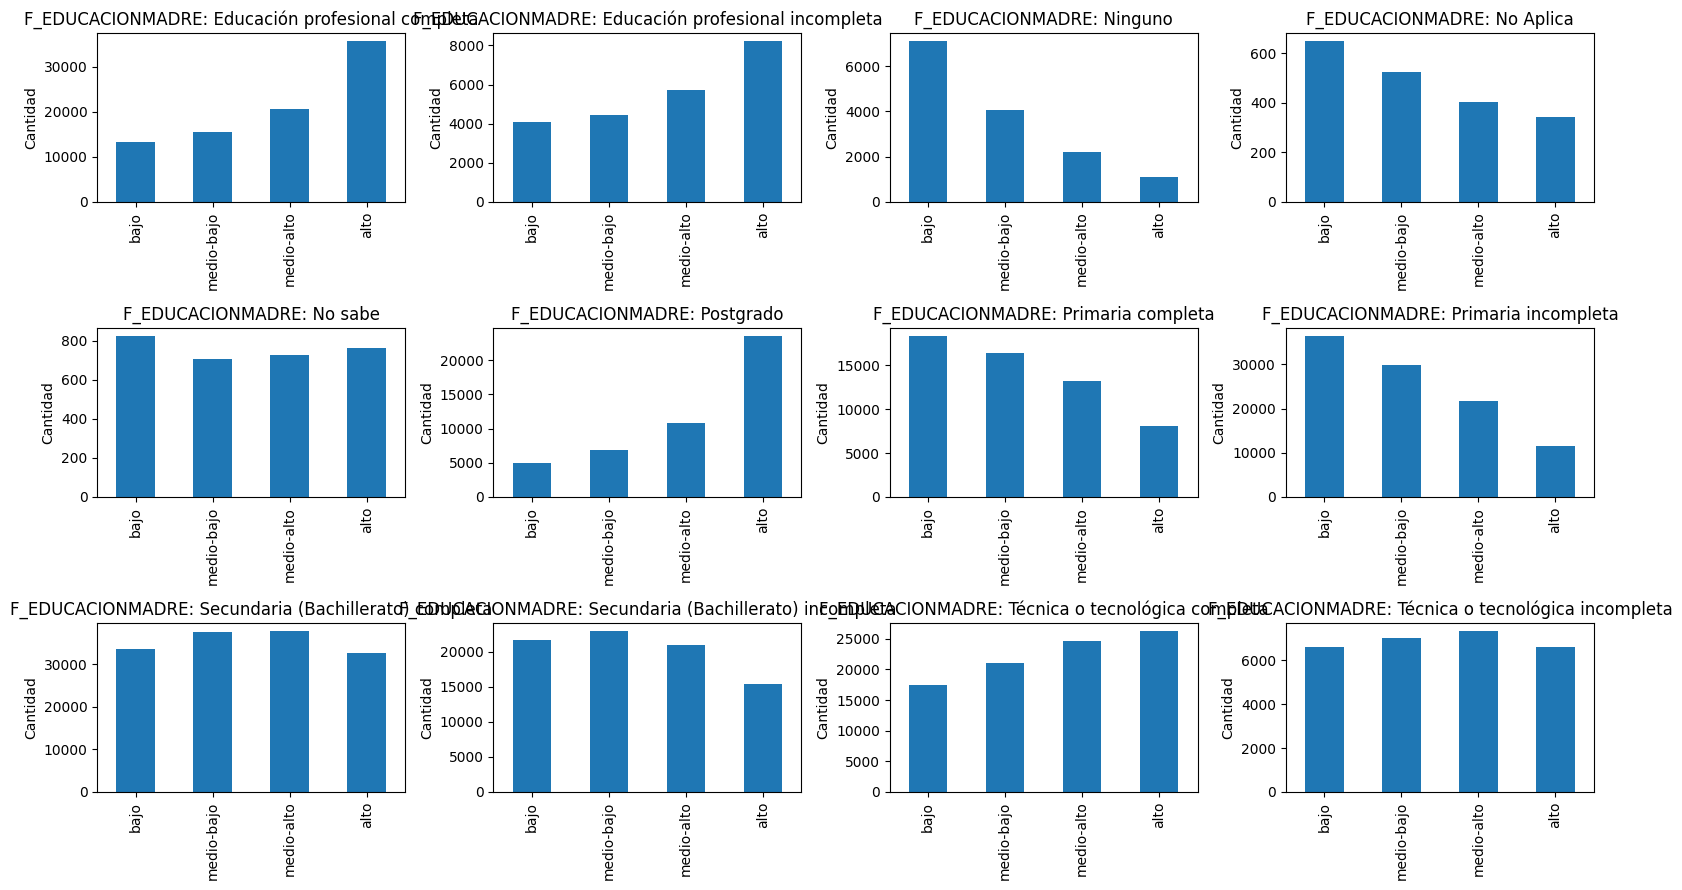

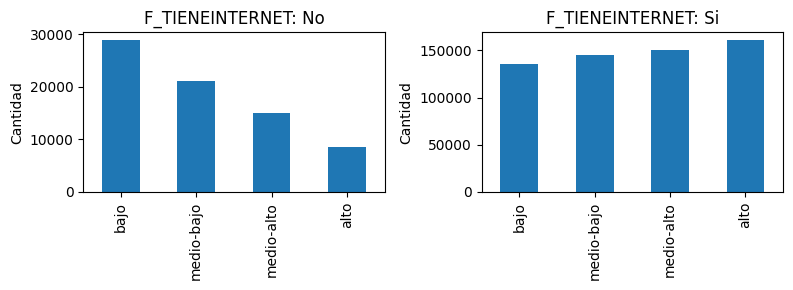

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

# Columnas reales del dataset (ajustadas)
cols = ['F_ESTRATOVIVIENDA', 'F_EDUCACIONPADRE', 'F_EDUCACIONMADRE', 'F_TIENEINTERNET']

for col in cols:
    if col in train.columns:
        categorias = sorted(train[col].dropna().unique())

        for ax, cat in subplots(categorias, n_cols=4, usizex=4):
            subset = train[train[col] == cat]

            # Reindex para mantener el orden fijo
            valores = subset['RENDIMIENTO_GLOBAL'].value_counts().reindex(
                ['bajo', 'medio-bajo', 'medio-alto', 'alto']
            )

            valores.plot(kind='bar', ax=ax)
            ax.set_title(f"{col}: {cat}")
            ax.set_xlabel("")
            ax.set_ylabel("Cantidad")
    else:
        print(f"⚠️ La columna '{col}' no existe en el DataFrame.")


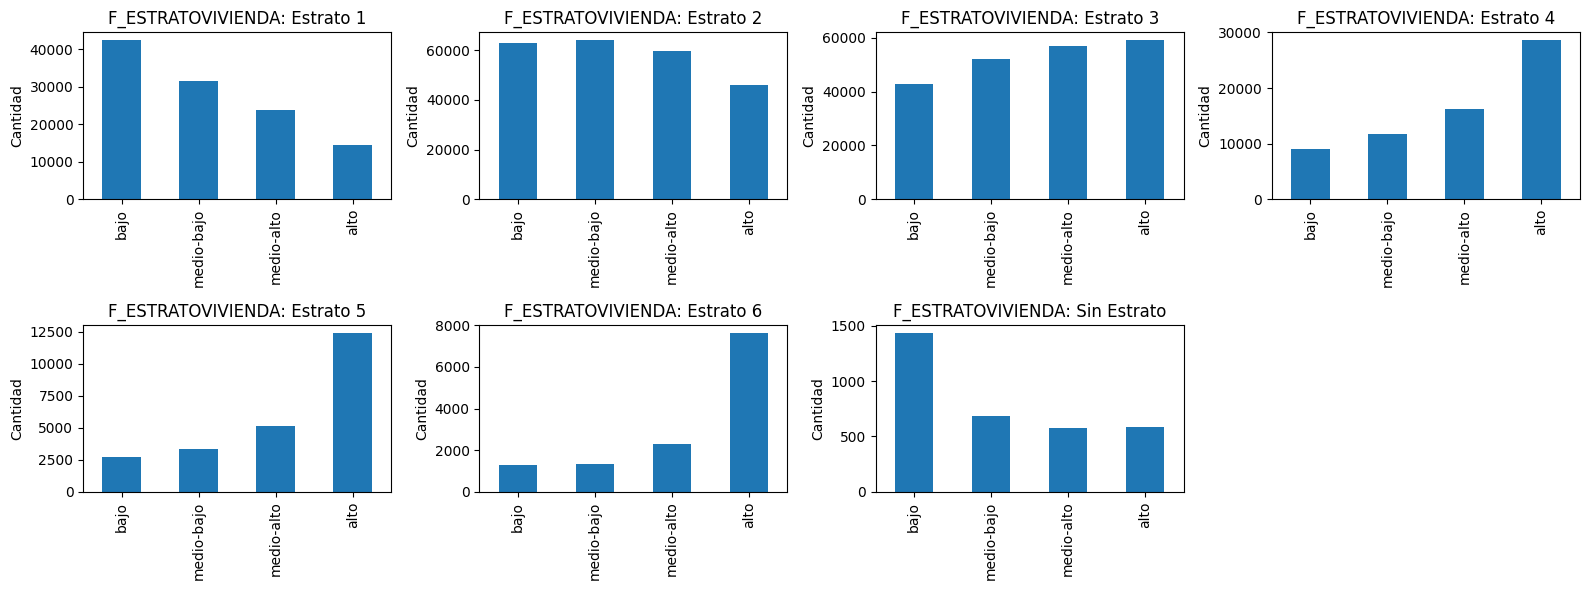

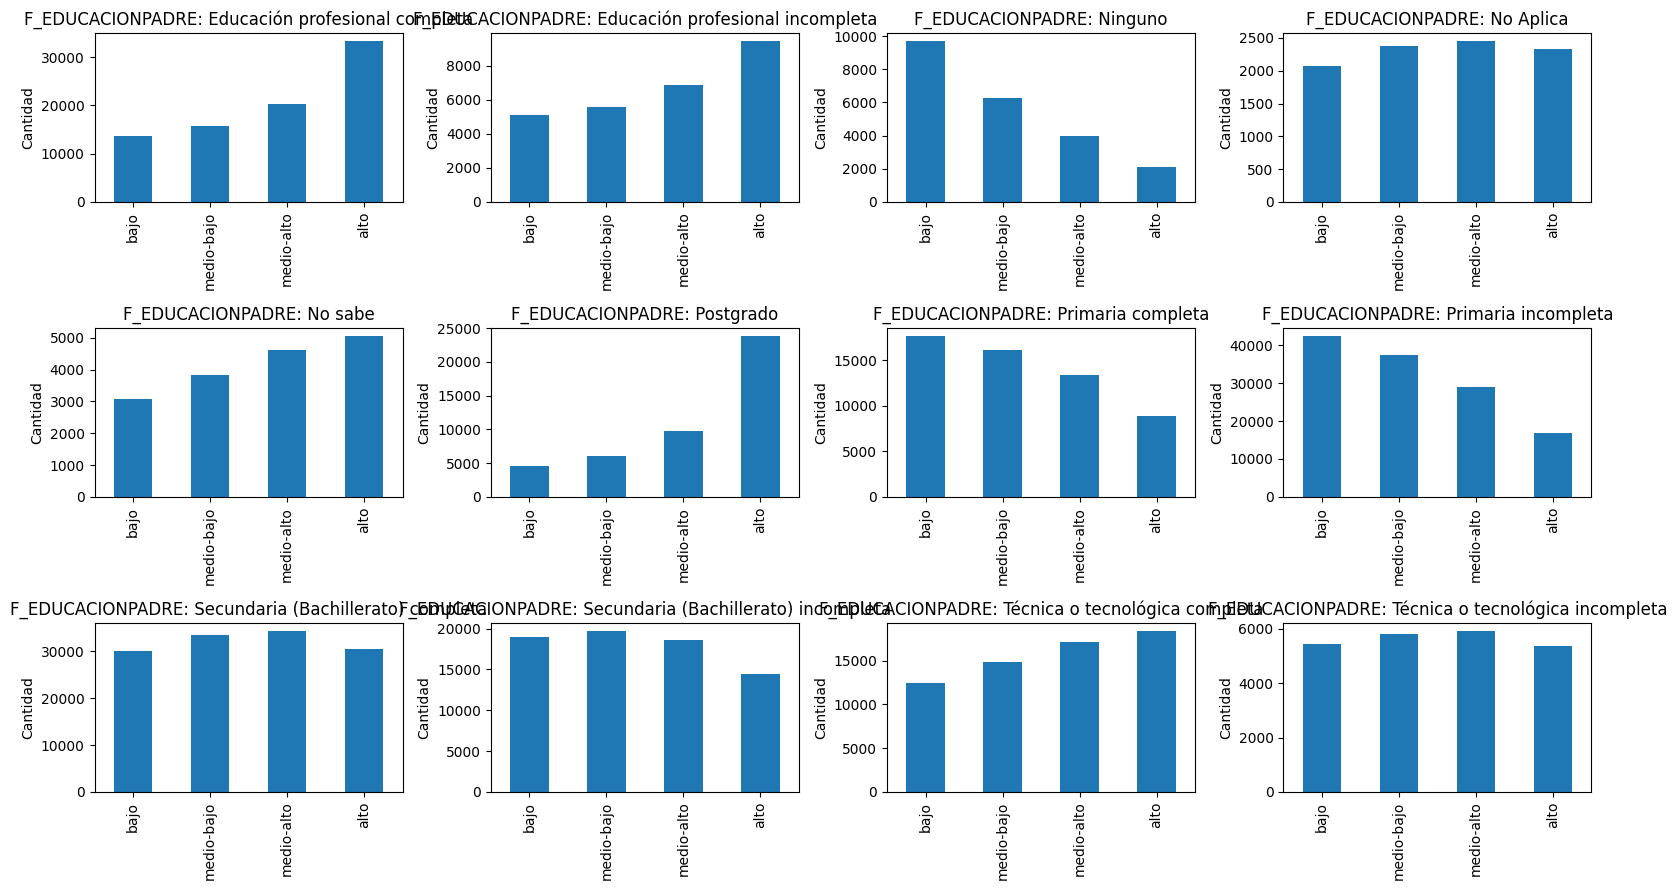

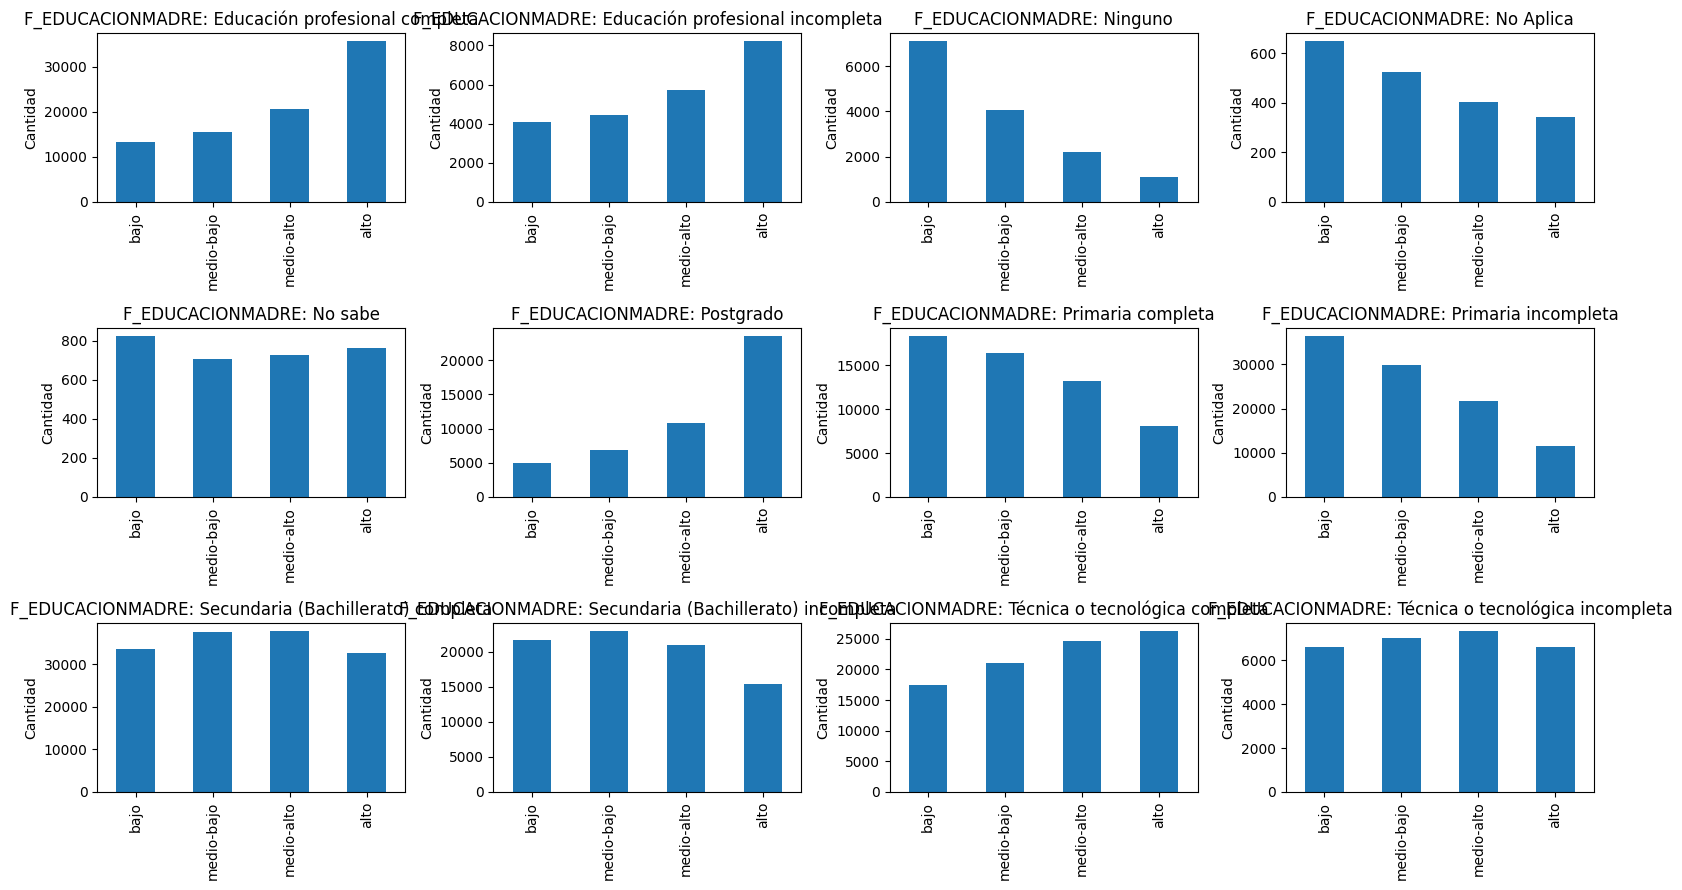

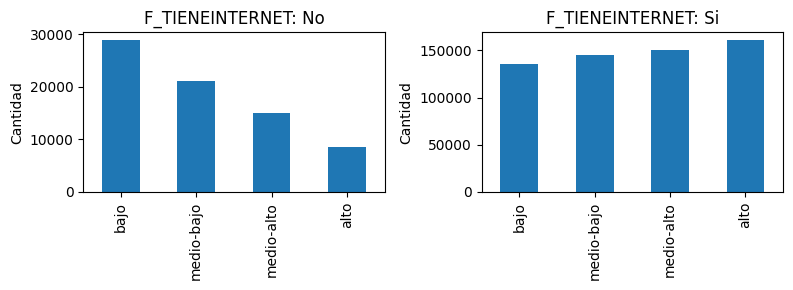

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

for col in ['F_ESTRATOVIVIENDA', 'F_EDUCACIONPADRE', 'F_EDUCACIONMADRE', 'F_TIENEINTERNET']:
    if col not in train.columns:
        print(f"⚠️ La columna '{col}' no existe en el DataFrame.")
        continue

    categorias = sorted(train[col].dropna().unique())

    for ax, cat in subplots(categorias, n_cols=4, usizex=4):
        subset = train[train[col] == cat]
        (
            subset['RENDIMIENTO_GLOBAL']
            .value_counts()
            .reindex(['bajo', 'medio-bajo', 'medio-alto', 'alto'])
            .plot(kind='bar', ax=ax)
        )
        ax.set_title(f"{col}: {cat}")
        ax.set_xlabel("")
        ax.set_ylabel("Cantidad")


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


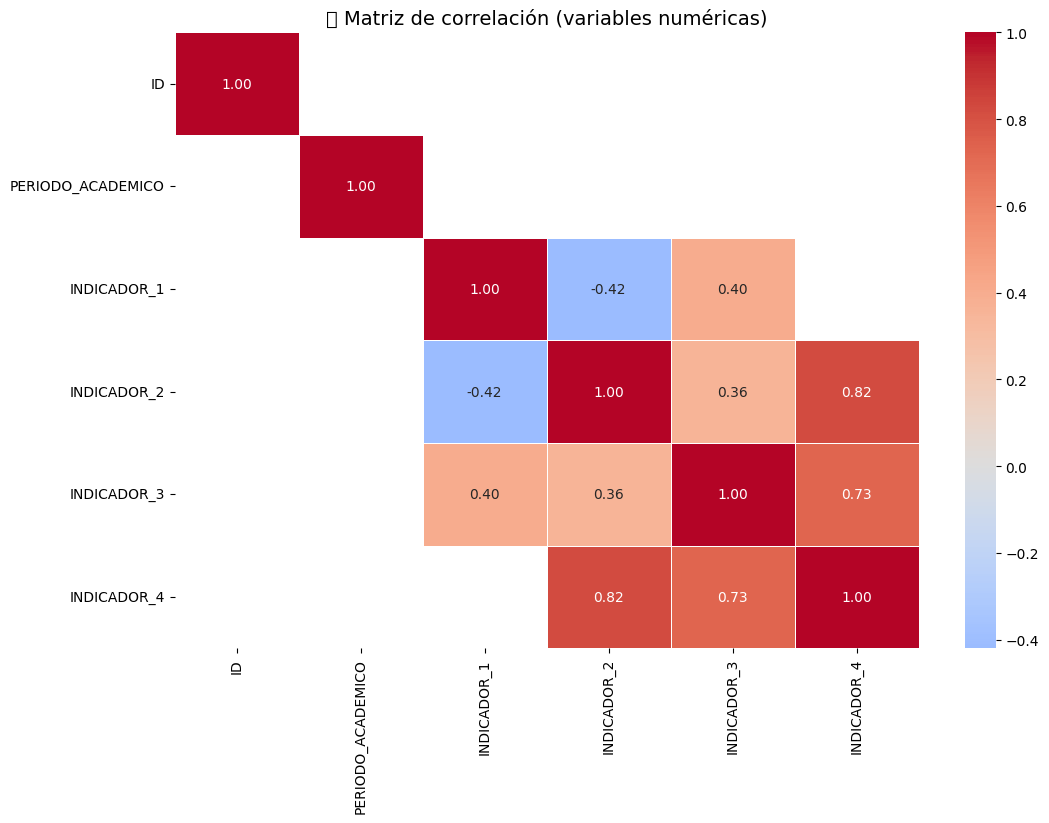

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula correlación solo de variables numéricas
corr = train.select_dtypes(include=['number']).corr()

# Opcional: mostrar solo correlaciones fuertes (>0.3 o <-0.3)
corr_filtrada = corr[(corr.abs() > 0.3)]

plt.figure(figsize=(12, 8))
sns.heatmap(corr_filtrada, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("🔍 Matriz de correlación (variables numéricas)", fontsize=14)
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='RENDIMIENTO_GLOBAL')
y = data['RENDIMIENTO_GLOBAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


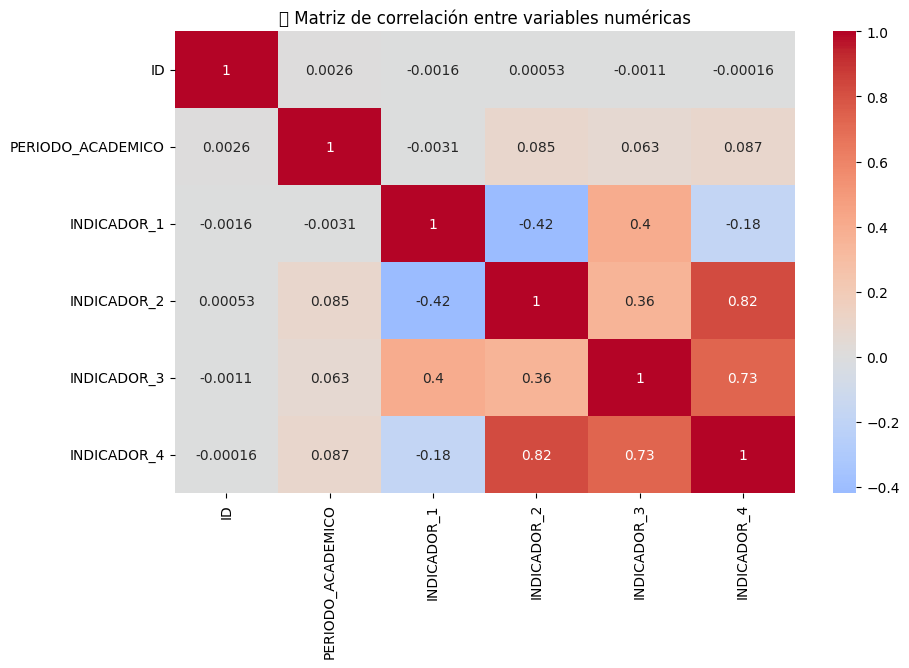

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación solo con variables numéricas
corr = train.select_dtypes(include=['number']).corr()

# Verificar si hay algo que graficar
if corr.empty:
    print("⚠️ No hay columnas numéricas para calcular la correlación.")
else:
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title("🔍 Matriz de correlación entre variables numéricas")
    plt.show()



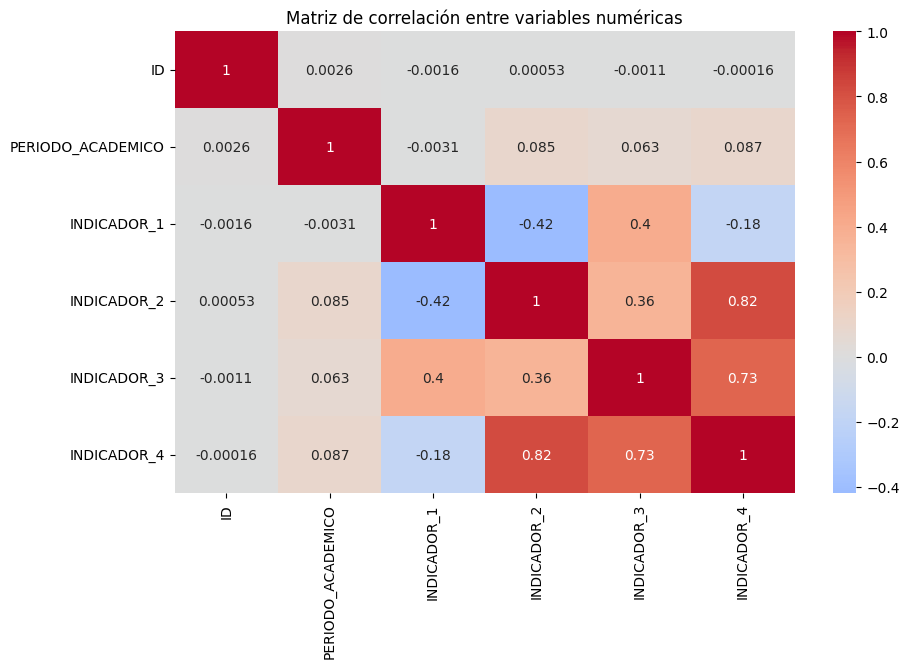

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular correlación solo con columnas numéricas
corr = train.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()



In [ ]:
data = data.dropna(subset=['RENDIMIENTO_GLOBAL'])


In [ ]:
data.shape


(692500, 6)

In [ ]:
print(data.shape)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)




(692500, 6)
(554000, 5) (138500, 5)
(554000,) (138500,)


In [ ]:
['F_ESTRATOVIVIENDA',
 'E_VALORMATRICULAUNIVERSIDAD',
 'F_EDUCACIONPADRE',
 'F_EDUCACIONMADRE',
 'F_TIENEINTERNET',
 'RENDIMIENTO_GLOBAL']


['F_ESTRATOVIVIENDA',
 'E_VALORMATRICULAUNIVERSIDAD',
 'F_EDUCACIONPADRE',
 'F_EDUCACIONMADRE',
 'F_TIENEINTERNET',
 'RENDIMIENTO_GLOBAL']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copia para trabajar sin alterar el original
data_encoded = data.copy()

# Crear el codificador
le = LabelEncoder()

# Convertir las columnas categóricas a números
for col in ['F_ESTRATOVIVIENDA', 'F_EDUCACIONPADRE', 'F_EDUCACIONMADRE', 'F_TIENEINTERNET', 'RENDIMIENTO_GLOBAL']:
    data_encoded[col] = le.fit_transform(data_encoded[col].astype(str))

# Verifica
data_encoded.head()



,F_ESTRATOVIVIENDA,E_VALORMATRICULAUNIVERSIDAD,F_EDUCACIONPADRE,F_EDUCACIONMADRE,F_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,2,7,11,5,1,2
1,2,5,10,11,0,0
2,2,5,8,8,1,0
3,3,6,4,8,1,3
4,2,5,6,6,1,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_matricula = LabelEncoder()
data_encoded['E_VALORMATRICULAUNIVERSIDAD'] = le_matricula.fit_transform(
    data_encoded['E_VALORMATRICULAUNIVERSIDAD'].astype(str)
)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = data_encoded.drop(columns='RENDIMIENTO_GLOBAL')
y = data_encoded['RENDIMIENTO_GLOBAL']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier(max_depth=8, random_state=42)
model.fit(X_train, y_train)

print("Modelo entrenado correctamente")


Modelo entrenado correctamente


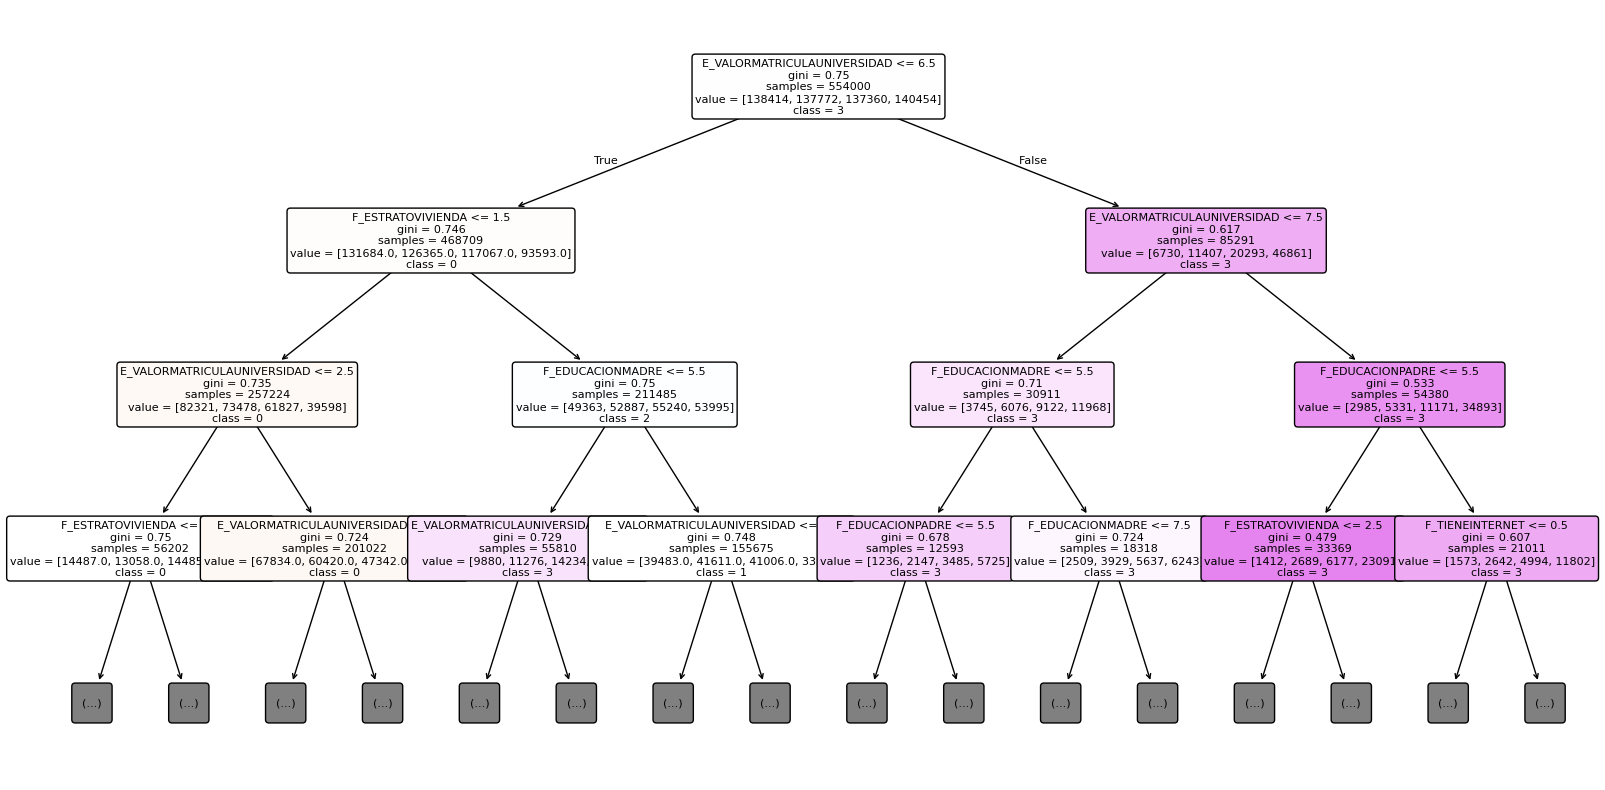

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(
    model,
    filled=True,
    feature_names=X.columns,
    class_names=[str(c) for c in model.classes_],  # convierte clases a texto
    rounded=True,
    fontsize=8,
    max_depth=3  # opcional, para hacerlo más legible
)
plt.show()



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Precisión:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))


Precisión: 0.3790469314079422

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.38      0.54      0.45     34573
           1       0.29      0.24      0.27     34503
           2       0.29      0.13      0.18     34259
           3       0.46      0.60      0.52     35165

    accuracy                           0.38    138500
   macro avg       0.36      0.38      0.35    138500
weighted avg       0.36      0.38      0.35    138500


Matriz de confusión:
 [[18669  7519  2988  5397]
 [14684  8423  3835  7561]
 [10583  7824  4368 11484]
 [ 5336  5129  3662 21038]]


In [ ]:
print("Valores únicos en y_train:")
print(y_train.unique())
print("\nValores únicos en y_test:")
print(y_test.unique())



Valores únicos en y_train:
[1 2 0 3]

Valores únicos en y_test:
[1 3 2 0]


In [ ]:
labels = ['0', '1', '2', '3']
ticklabels = ['bajo', 'medio-bajo', 'medio-alto', 'alto']


/tmp/ipython-input-2864470442.py:4: RuntimeWarning: invalid value encountered in divide
  cm_train = cm_train / cm_train.sum(axis=1, keepdims=True)
/tmp/ipython-input-2864470442.py:5: RuntimeWarning: invalid value encountered in divide
  cm_test = cm_test / cm_test.sum(axis=1, keepdims=True)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


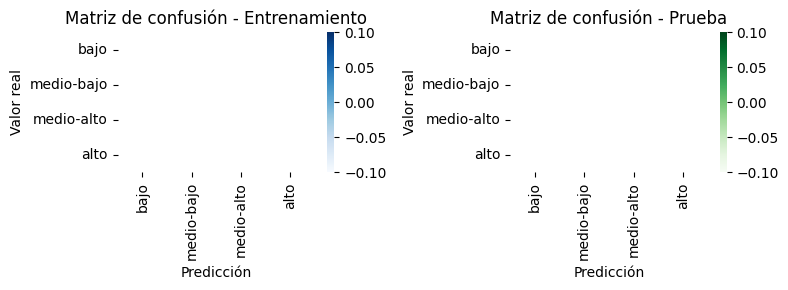

In [ ]:
cm_train = confusion_matrix(y_train, model.predict(X_train), labels=labels)
cm_test = confusion_matrix(y_test, model.predict(X_test), labels=labels)

cm_train = cm_train / cm_train.sum(axis=1, keepdims=True)
cm_test = cm_test / cm_test.sum(axis=1, keepdims=True)

for ax, i in subplots(2, n_cols=2, usizex=4):
    if i == 0:
        sns.heatmap(cm_train, annot=True, cmap="Blues", xticklabels=ticklabels,
                    yticklabels=ticklabels, ax=ax)
        ax.set_title("Matriz de confusión - Entrenamiento")
    if i == 1:
        sns.heatmap(cm_test, annot=True, cmap="Greens", xticklabels=ticklabels,
                    yticklabels=ticklabels, ax=ax)
        ax.set_title("Matriz de confusión - Prueba")

    ax.set_xlabel("Predicción")
    ax.set_ylabel("Valor real")

plt.tight_layout()
plt.show()



In [ ]:
import os
print(os.listdir())


['.config', 'udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip', 'data', 'kaggle.json', '.ipynb_checkpoints', 'sample_data']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import time

#Reducción Dataset

In [ ]:
MAX_SAMPLES = 20000  # Limitado a 20k muestras para entrenamiento
                     # SVM NO escala bien con datasets grandes

print(f"Dataset original: {len(X)} muestras")

if len(X) > MAX_SAMPLES:
    print(f"ADVERTENCIA: Dataset muy grande para SVM. Reduciendo a {MAX_SAMPLES} muestras...")
    X_sampled, _, y_sampled, _ = train_test_split(X, y,
                                                    train_size=MAX_SAMPLES,
                                                    random_state=42,
                                                    stratify=None)
    X_use, y_use = X_sampled, y_sampled
else:
    X_use, y_use = X, y

#División de datos

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_use, y_use, test_size=0.2, random_state=42
)

print(f"Muestras de entrenamiento: {len(X_train)}")
print(f"Muestras de validación: {len(X_val)}")


## Definición del Pipeline

In [ ]:
pipeline_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(cache_size=1000))  # Aumentar cache ayuda con la velocidad
])

#Búsqueda aleatoria

In [ ]:
param_distributions = {
    'svr__kernel': ['rbf'],
    'svr__C': [0.1, 1, 10, 100, 1000],
    'svr__gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'svr__epsilon': [0.01, 0.1, 0.5]
}

print("\n🚀 Iniciando búsqueda aleatoria de hiperparámetros...")
print("Esto probará solo 10 combinaciones en lugar de todas")

random_search = RandomizedSearchCV(
    estimator=pipeline_svr,
    param_distributions=param_distributions,
    n_iter=10,              # Solo 10 combinaciones (vs 30 en GridSearch)
    cv=3,                   # 3-fold cross validation
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,              # Usar todos los cores
    verbose=2,
    random_state=42
)

#Optimización de Hiperparámetros

In [ ]:
best_model_svr = random_search.best_estimator_

for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")

## Evaluación

In [ ]:
y_pred_val = best_model_svr.predict(X_val)
rmse_svr = np.sqrt(mean_squared_error(y_val, y_pred_val))

print(f"RMSE: {rmse_svr:.4f}")
print(f"Score R²: {best_model_svr.score(X_val, y_val):.4f}")

## COMPARACIÓN VISUAL

In [ ]:
comparison = pd.DataFrame({
    'Real': y_val[:15],
    'Predicho': y_pred_val[:15],
    'Error': np.abs(y_val[:15] - y_pred_val[:15])
})

print(comparison.to_string(index=False))

## Info Adicional


In [ ]:
print(f"Vectores de soporte: {len(best_model_svr.named_steps['svr'].support_vectors_)}")
print("\n ")
print(f"Porcentaje de vectores de soporte: {len(best_model_svr.named_steps['svr'].support_vectors_)/len(X_train)*100:.1f}%")
print("\n Entrenamiento completado exitosamente")